In [1]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import theano
import theano.tensor as T
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

Using gpu device 0: GeForce GTX 480 (CNMeM is disabled, cuDNN not available)
/home/varun/anaconda2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
/home/varun/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# create the training & test sets, skipping the header row with [1:]
dataset = pd.read_csv("train.csv")
target = dataset[[0]].values.ravel()
train = dataset.iloc[:,1:].values
test = pd.read_csv("test.csv").values

In [3]:
# create and train the random forest
# multi-core CPUs can use: rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
rf.fit(train, target)
pred = rf.predict(test)

np.savetxt('submission_rand_forest.csv', np.c_[range(1,len(test)+1),pred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

In [4]:
#print(dataset.head())

In [5]:
# convert to array, specify data type, and reshape
target = target.astype(np.uint8)
train = np.array(train).reshape((-1, 1, 28, 28)).astype(np.uint8)
test = np.array(test).reshape((-1, 1, 28, 28)).astype(np.uint8)


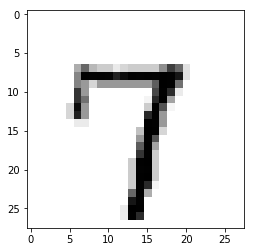

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(train[6][0], cmap=cm.binary) # draw the picture

In [7]:
net2 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('dense', layers.DenseLayer),
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    #input layer
    input_shape=(None, 1, 28, 28),
    
    #layer conv2d1
    conv2d1_num_filters=32,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),  
    
    # layer maxpool1
    maxpool1_pool_size=(2, 2),    
    
    # layer conv2d2
    conv2d2_num_filters=32,
    conv2d2_filter_size=(5, 5),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    
    # layer maxpool2
    maxpool2_pool_size=(2, 2),
    
    # dropout1
    dropout1_p=0.5,  
    
    # dense
    dense_num_units=256,
    dense_nonlinearity=lasagne.nonlinearities.rectify,    
    
    # dropout2
    dropout2_p=0.5,
    
    # output
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.0001,
    update_momentum=0.9,
    max_epochs=110,
    verbose=1,
    )

# Train the network
net2.fit(train, target)

/home/varun/anaconda2/lib/python2.7/site-packages/lasagne/layers/conv.py:489: UserWarning: The `image_shape` keyword argument to `tensor.nnet.conv2d` is deprecated, it has been renamed to `input_shape`.
  border_mode=border_mode)


# Neural Network with 160362 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x28x28
  1  conv2d1   32x24x24
  2  maxpool1  32x12x12
  3  conv2d2   32x8x8
  4  maxpool2  32x4x4
  5  dropout1  32x4x4
  6  dense     256
  7  dropout2  256
  8  output    10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -----
      1     2.96819     2.07994    1.42706      0.24224  7.88s
      2     2.11820     2.01984    1.04870      0.27496  7.95s
      3     2.04942     1.90714    1.07461      0.35776  8.14s
      4     1.98320     1.84208    1.07661      0.38941  7.96s
      5     1.93969     1.77383    1.09351      0.40797  7.94s
      6     1.89230     1.68396    1.12372      0.43486  8.11s
      7     1.84503     1.61904    1.13958      0.48507  7.90s
      8     1.77647     1.50013    1.18420      0.55967  7.92s
      9     1.69748     1.38181    1.22845      0.59548  8.05

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f05b64840d0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f05b6478f90>,
     check_input=True,
     conv2d1_W=<lasagne.init.GlorotUniform object at 0x7f05b6459790>,
     conv2d1_filter_size=(5, 5),
     conv2d1_nonlinearity=<function rectify at 0x7f05b6958398>,
     conv2d1_num_filters=32, conv2d2_filter_size=(5, 5),
     conv2d2_nonlinearity=<function rectify at 0x7f05b6958398>,
     conv2d2_num_filters=32, custom_scores=None,
     dense_nonlinearity=<function rectify at 0x7f05b6958398>,
     dense_num_units=256, dropout1_p=0.5, dropout2_p=0.5,
     input_shape=(None, 1, 28, 28),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('conv2d1', <class 'lasagne.layers.conv.Conv2DLayer'>), ('maxpool1', <class 'lasagne.layers.pool.MaxPool2DLayer'>), ('conv2d2', <class 'lasagne.layers.conv.Conv2DLayer'>), ('maxpool2', <class 'lasagne.layers.po

<module 'matplotlib.pyplot' from '/home/varun/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

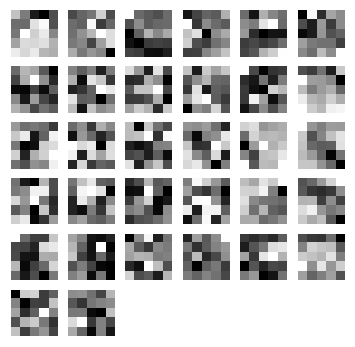

In [8]:
visualize.plot_conv_weights(net2.layers_['conv2d1'])

/home/varun/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<module 'matplotlib.pyplot' from '/home/varun/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

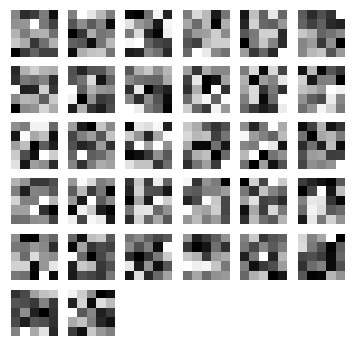

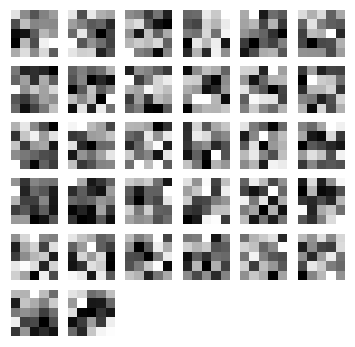

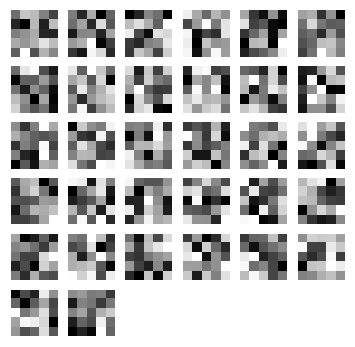

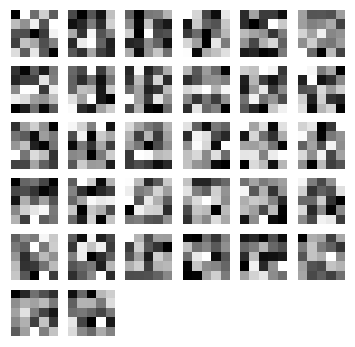

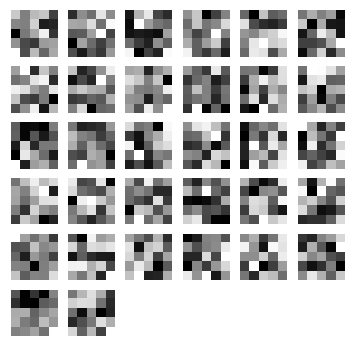

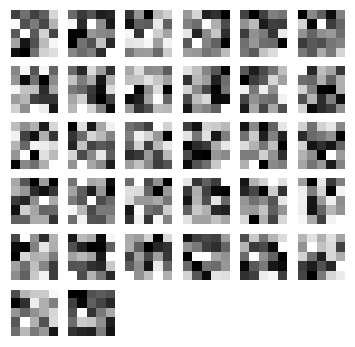

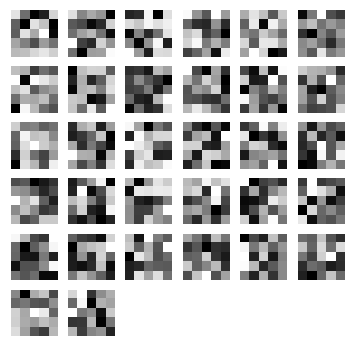

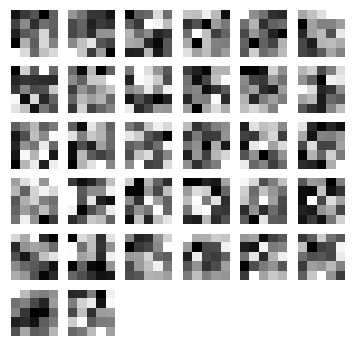

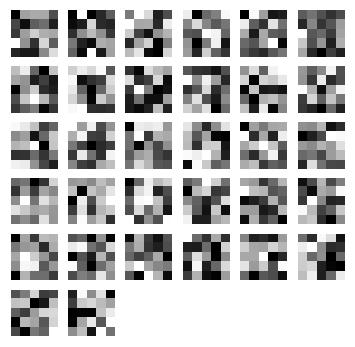

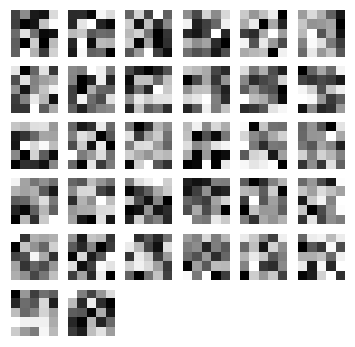

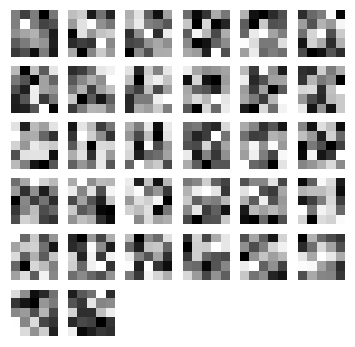

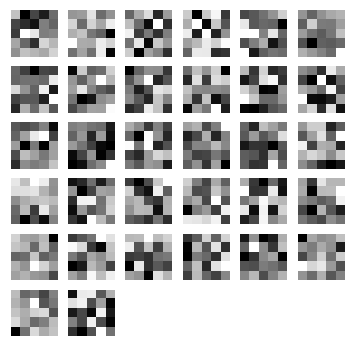

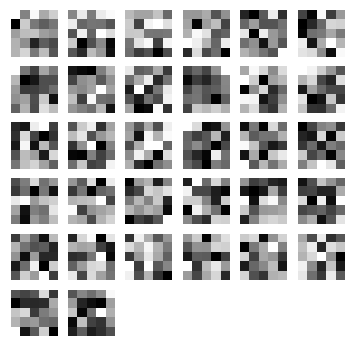

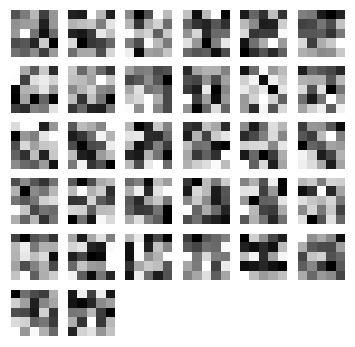

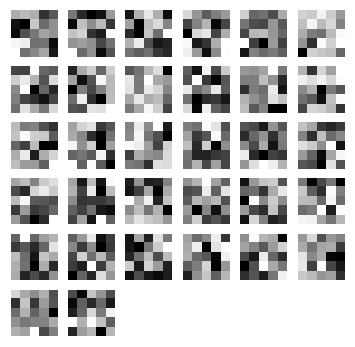

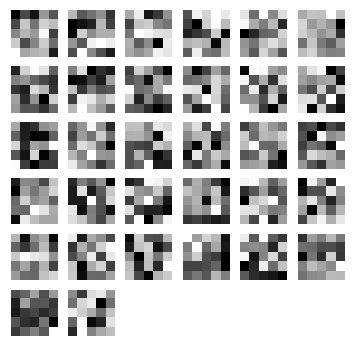

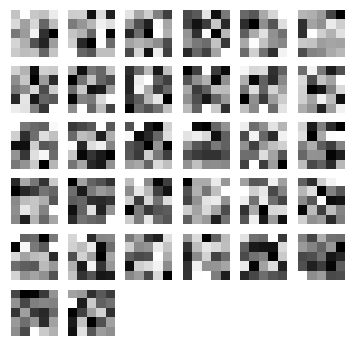

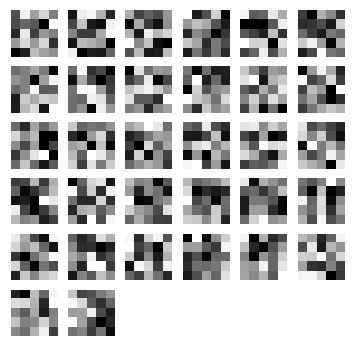

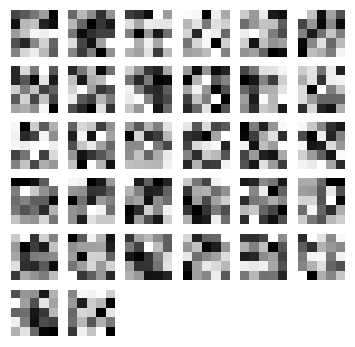

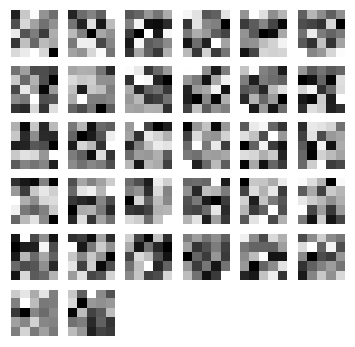

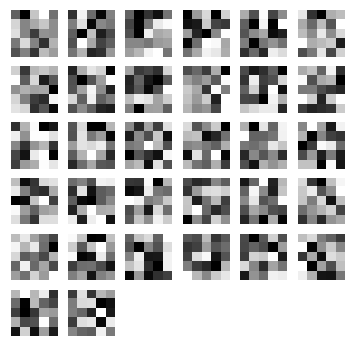

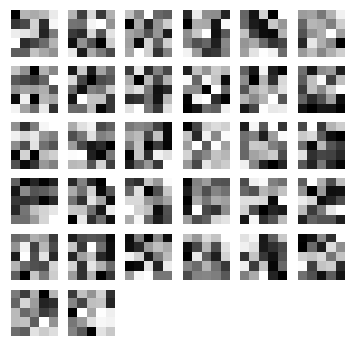

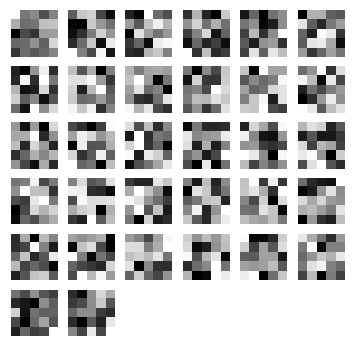

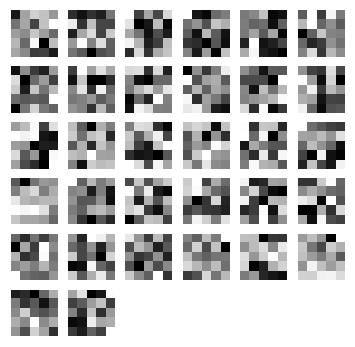

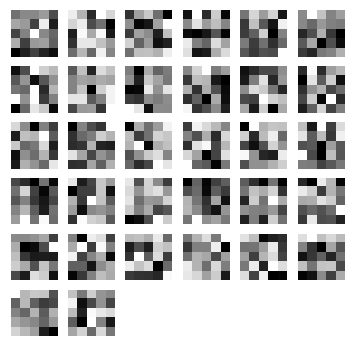

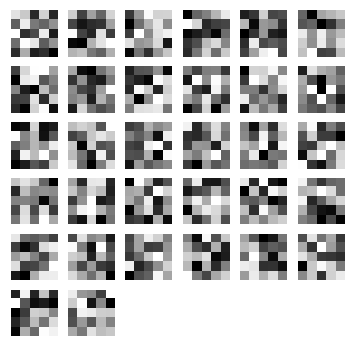

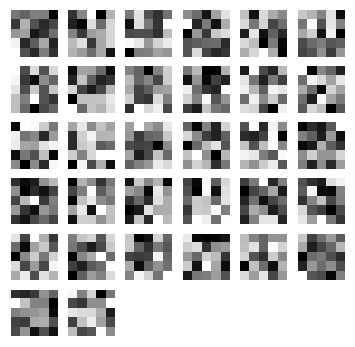

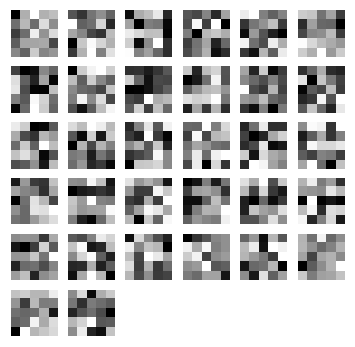

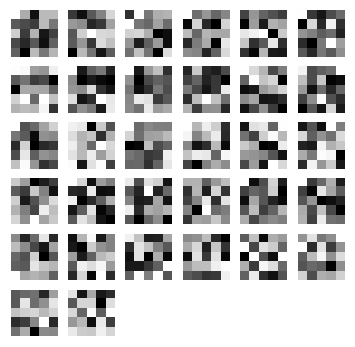

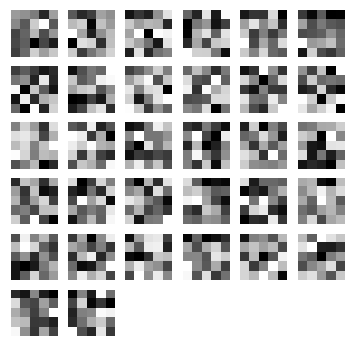

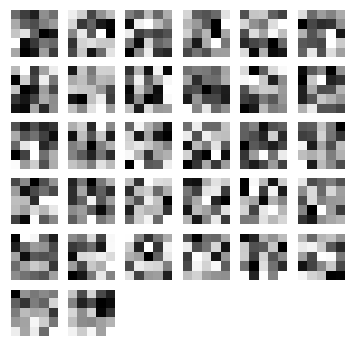

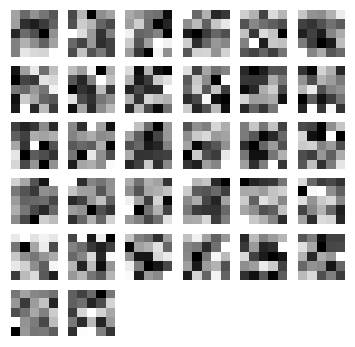

In [15]:
visualize.plot_conv_weights(net2.layers_['conv2d2'])

In [97]:
preds = net1.predict(test)

In [98]:
dense_layer = layers.get_output(net2.layers_['dense'], deterministic=True)
output_layer = layers.get_output(net2.layers_['output'], deterministic=True)
input_var = net2.layers_['input'].input_var
f_output = theano.function([input_var], output_layer)
f_dense = theano.function([input_var], dense_layer)

In [99]:
instance = test[3][None, :, :]
%timeit -n 500 f_output(instance)

500 loops, best of 3: 1.93 ms per loop


<Container object of 10 artists>

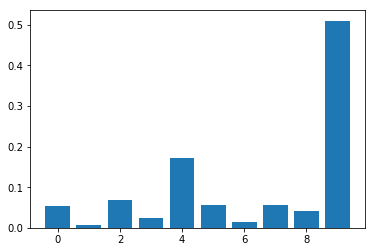

In [100]:
pred = f_output(instance)
N = pred.shape[1]
plt.bar(range(N), pred.ravel())

In [ ]:
net1 = NeuralNet(
        layers=[('input', layers.InputLayer),
                ('hidden', layers.DenseLayer),
                ('output', layers.DenseLayer),
                ],
        # layer parameters:
        input_shape=(None,1,28,28),
        
        # hidden layers
        hidden_num_units=100, # number of units in 'hidden' layer
    
        # output layers
        output_nonlinearity=lasagne.nonlinearities.softmax,
        output_num_units=10,  # 10 target values for the digits 0, 1, 2, ..., 9

        # optimization method:
        update=nesterov_momentum,
        update_learning_rate=0.0001,
        update_momentum=0.9,

        max_epochs=15,
        verbose=1,
        )

# Train the network
net1.fit(train, target)

In [32]:
def CNN(n_epochs):
    net1 = NeuralNet(
        layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),      #Convolutional layer.  Params defined below
        ('pool1', layers.MaxPool2DLayer),   # Like downsampling, for execution speed
        ('conv2', layers.Conv2DLayer),
        ('hidden3', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],

    input_shape=(None, 1, 28, 28),
    conv1_num_filters=7, 
    conv1_filter_size=(3, 3), 
    conv1_nonlinearity=lasagne.nonlinearities.rectify,
        
    pool1_pool_size=(2, 2),
        
    conv2_num_filters=12, 
    conv2_filter_size=(2, 2),    
    conv2_nonlinearity=lasagne.nonlinearities.rectify,
        
    hidden3_num_units=1000,
    output_num_units=10, 
    output_nonlinearity=lasagne.nonlinearities.softmax,

    update_learning_rate=0.0001,
    update_momentum=0.9,

    max_epochs=n_epochs,
    verbose=1,
    )
    return net1

cnn = CNN(15).fit(train,target) 